In [1]:
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df = pd.DataFrame( { 
    "Sepal length" : iris.data[: , 0 ] ,
    "Sepal width" : iris.data[: , 1 ] ,
    "Petal length" : iris.data[: , 2 ] ,
    "Petal length" : iris.data[: , 3 ] ,
    "Species" : iris.target
    }
)

df


,Sepal length,Sepal width,Petal length,Species
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0
...,...,...,...,...
145,6.7,3.0,2.3,2
146,6.3,2.5,1.9,2
147,6.5,3.0,2.0,2
148,6.2,3.4,2.3,2


In [7]:
df.head()


,Sepal length,Sepal width,Petal length,Species
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0


In [8]:
Y = df.Species
Y.unique()

array([0, 1, 2])

In [9]:
X = df.drop( columns= [ "Species" ] )
X

,Sepal length,Sepal width,Petal length
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [10]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X , Y , test_size=0.3, train_size= 0.7, random_state=0 )

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( n_estimators = 5, criterion = 'entropy', random_state = 0 )
classifier.fit( xtrain, ytrain )

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [12]:
ypred = classifier.predict(xtest)
ypred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

<AxesSubplot:>

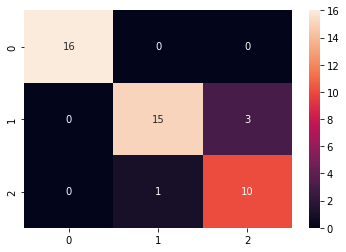

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix( ytest, ypred )
sns.heatmap( cm, annot = True )

In [14]:
accuracy_score( ytest, ypred )

0.9111111111111111

In [15]:
print (classification_report( ytest, ypred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.83      0.88        18
           2       0.77      0.91      0.83        11

    accuracy                           0.91        45
   macro avg       0.90      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

